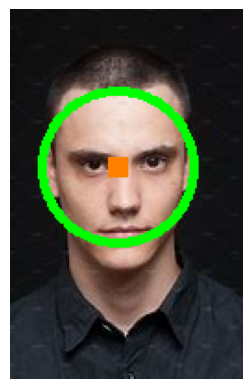

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('img3.jfif')

# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply a Gaussian blur to the image
blurred = cv2.GaussianBlur(gray, (9, 9), 2)

# Use HoughCircles to detect circles in the image
circles = cv2.HoughCircles(blurred, cv2.HOUGH_GRADIENT, dp=1.2, minDist=100, param1=100, param2=30, minRadius=20, maxRadius=100)

# If some circles are detected, proceed to draw them
if circles is not None:
    circles = np.round(circles[0, :]).astype("int")
    for (x, y, r) in circles:
        # Draw the circle in the output image
        cv2.circle(image, (x, y), r, (0, 255, 0), 4)
        # Draw a rectangle in the center of the circle
        cv2.rectangle(image, (x - 5, y - 5), (x + 5, y + 5), (0, 128, 255), -1)

# Convert image from BGR to RGB (for matplotlib)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the image using matplotlib
plt.imshow(image_rgb)
plt.axis('off')  # Turn off axis numbers and ticks
plt.show()



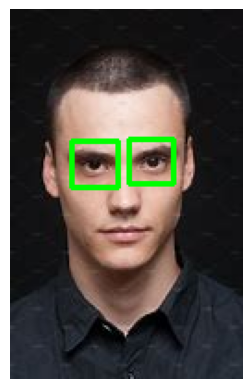

In [16]:
import cv2
import numpy as np

# Load the face and eye cascades
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

# Load the image
image = cv2.imread('img3.jfif')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Detect faces in the image
faces = face_cascade.detectMultiScale(gray, 1.3, 5)

# Loop over each detected face
for (x, y, w, h) in faces:
    # Draw rectangle around the face
    
    
    # Region of interest for eyes
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = image[y:y+h, x:x+w]
    
    # Detect eyes in the face region
    eyes = eye_cascade.detectMultiScale(roi_gray)
    
    # Loop over each detected eye
    for (ex, ey, ew, eh) in eyes:
        # Draw rectangle around the eyes
        cv2.rectangle(roi_color, (ex, ey), (ex+ew, ey+eh), (0, 255, 0), 2)
        
        # Region of interest for the iris
        eye_roi_gray = roi_gray[ey:ey+eh, ex:ex+ew]
        eye_roi_color = roi_color[ey:ey+eh, ex:ex+ew]
        
        # Apply a Gaussian blur to the eye region
        blurred_eye = cv2.GaussianBlur(eye_roi_gray, (9, 9), 2)
        
        # Use HoughCircles to detect circles in the eye region
        circles = cv2.HoughCircles(blurred_eye, cv2.HOUGH_GRADIENT, dp=1.2, minDist=20, param1=50, param2=30, minRadius=0, maxRadius=0)
        
        # If circles (irises) are detected, draw them
        if circles is not None:
            circles = np.round(circles[0, :]).astype("int")
            for (cx, cy, r) in circles:
                cv2.circle(eye_roi_color, (cx, cy), r, (0, 255, 255), 2)

# Display the result using matplotlib
import matplotlib.pyplot as plt
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')  # Hide axis
plt.show()


In [17]:
import labelme

In [19]:
import cv2
import numpy as np

# Load the face and eye cascades
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

# Capture video from the webcam
cap = cv2.VideoCapture(0)

while True:
    # Read the frame from the webcam
    ret, frame = cap.read()
    if not ret:
        break

    # Convert the frame to grayscale
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Detect faces in the frame
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)

    # Loop over each detected face
    for (x, y, w, h) in faces:
        # Draw rectangle around the face
        cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)
        
        # Region of interest for eyes
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = frame[y:y+h, x:x+w]
        
        # Detect eyes in the face region
        eyes = eye_cascade.detectMultiScale(roi_gray)
        
        # Loop over each detected eye
        for (ex, ey, ew, eh) in eyes:
            # Draw rectangle around the eyes
            cv2.rectangle(roi_color, (ex, ey), (ex+ew, ey+eh), (0, 255, 0), 2)
            
            # Region of interest for the iris
            eye_roi_gray = roi_gray[ey:ey+eh, ex:ex+ew]
            eye_roi_color = roi_color[ey:ey+eh, ex:ex+ew]
            
            # Apply a Gaussian blur to the eye region
            blurred_eye = cv2.GaussianBlur(eye_roi_gray, (9, 9), 2)
            
            # Use HoughCircles to detect circles in the eye region
            circles = cv2.HoughCircles(blurred_eye, cv2.HOUGH_GRADIENT, dp=1.2, minDist=20, param1=50, param2=30, minRadius=0, maxRadius=0)
            
            # If circles (irises) are detected, draw them
            if circles is not None:
                circles = np.round(circles[0, :]).astype("int")
                for (cx, cy, r) in circles:
                    cv2.circle(eye_roi_color, (cx, cy), r, (0, 255, 255), 2)

    # Display the frame
    cv2.imshow('Webcam Face and Eye Detection', frame)

    # Break the loop if 'q' is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the webcam and close all windows
cap.release()
cv2.destroyAllWindows()


error: OpenCV(4.10.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:1301: error: (-2:Unspecified error) The function is not implemented. Rebuild the library with Windows, GTK+ 2.x or Cocoa support. If you are on Ubuntu or Debian, install libgtk2.0-dev and pkg-config, then re-run cmake or configure script in function 'cvShowImage'


In [20]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the face and eye cascades
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

# Capture video from the webcam
cap = cv2.VideoCapture(0)

while True:
    # Read the frame from the webcam
    ret, frame = cap.read()
    if not ret:
        break

    # Convert the frame to grayscale
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Detect faces in the frame
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)

    # Loop over each detected face
    for (x, y, w, h) in faces:
        # Draw rectangle around the face
        cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)
        
        # Region of interest for eyes
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = frame[y:y+h, x:x+w]
        
        # Detect eyes in the face region
        eyes = eye_cascade.detectMultiScale(roi_gray)
        
        # Loop over each detected eye
        for (ex, ey, ew, eh) in eyes:
            # Draw rectangle around the eyes
            cv2.rectangle(roi_color, (ex, ey), (ex+ew, ey+eh), (0, 255, 0), 2)
            
            # Region of interest for the iris
            eye_roi_gray = roi_gray[ey:ey+eh, ex:ex+ew]
            eye_roi_color = roi_color[ey:ey+eh, ex:ex+ew]
            
            # Apply a Gaussian blur to the eye region
            blurred_eye = cv2.GaussianBlur(eye_roi_gray, (9, 9), 2)
            
            # Use HoughCircles to detect circles in the eye region
            circles = cv2.HoughCircles(blurred_eye, cv2.HOUGH_GRADIENT, dp=1.2, minDist=20, param1=50, param2=30, minRadius=0, maxRadius=0)
            
            # If circles (irises) are detected, draw them
            if circles is not None:
                circles = np.round(circles[0, :]).astype("int")
                for (cx, cy, r) in circles:
                    cv2.circle(eye_roi_color, (cx, cy), r, (0, 255, 255), 2)

    # Convert BGR to RGB for matplotlib


In [35]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the face and eye cascades
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

# Capture video from the webcam
cap = cv2.VideoCapture(0)

# Create a figure and axis to display the frames
fig, ax = plt.subplots()
plt.ion()  # Turn on interactive mode

while True:
    # Read the frame from the webcam
    ret, frame = cap.read()
    if not ret:
        break

    # Convert the frame to grayscale
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Detect faces in the frame
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)

    # Loop over each detected face
    for (x, y, w, h) in faces:
        # Draw rectangle around the face
        cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)
        
        # Region of interest for eyes
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = frame[y:y+h, x:x+w]
        
        # Detect eyes in the face region
        eyes = eye_cascade.detectMultiScale(roi_gray)
        
        # Loop over each detected eye
        for (ex, ey, ew, eh) in eyes:
            # Draw rectangle around the eyes
            cv2.rectangle(roi_color, (ex, ey), (ex+ew, ey+eh), (0, 255, 0), 2)
            
            # Region of interest for the iris
            eye_roi_gray = roi_gray[ey:ey+eh, ex:ex+ew]
            eye_roi_color = roi_color[ey:ey+eh, ex:ex+ew]
            
            # Apply a Gaussian blur to the eye region
            blurred_eye = cv2.GaussianBlur(eye_roi_gray, (9, 9), 2)
            
            # Use HoughCircles to detect circles in the eye region
            circles = cv2.HoughCircles(blurred_eye, cv2.HOUGH_GRADIENT, dp=1.2, minDist=20, param1=50, param2=30, minRadius=0, maxRadius=0)
            
            # If circles (irises) are detected, draw them
            if circles is not None:
                circles = np.round(circles[0, :]).astype("int")
                for (cx, cy, r) in circles:
                    cv2.circle(eye_roi_color, (cx, cy), r, (0, 255, 255), 2)

    # Convert BGR to RGB for matplotlib
    rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # Update the image in the figure
    ax.imshow(rgb_frame)
    plt.draw()
    plt.pause(0.001)

    # Break the loop if 'q' is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the webcam and close all windows
cap.release()
plt.close()


In [39]:
import cv2
import numpy as np

# Load the face and eye cascades
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

# Capture video from the webcam
cap = cv2.VideoCapture(0)

while True:
    # Read the frame from the webcam
    ret, frame = cap.read()
    if not ret:
        break

    # Convert the frame to grayscale
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Detect faces in the frame
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)

    # Loop over each detected face
    for (x, y, w, h) in faces:
        # Draw rectangle around the face
        cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)
        
        # Region of interest for eyes
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = frame[y:y+h, x:x+w]
        
        # Detect eyes in the face region
        eyes = eye_cascade.detectMultiScale(roi_gray)
        
        # Loop over each detected eye
        for (ex, ey, ew, eh) in eyes:
            # Draw rectangle around the eyes
            cv2.rectangle(roi_color, (ex, ey), (ex+ew, ey+eh), (0, 255, 0), 2)
            
            # Region of interest for the iris
            eye_roi_gray = roi_gray[ey:ey+eh, ex:ex+ew]
            eye_roi_color = roi_color[ey:ey+eh, ex:ex+ew]
            
            # Apply a Gaussian blur to the eye region
            blurred_eye = cv2.GaussianBlur(eye_roi_gray, (9, 9), 2)
            
            # Use HoughCircles to detect circles in the eye region
            circles = cv2.HoughCircles(blurred_eye, cv2.HOUGH_GRADIENT, dp=1.2, minDist=20, param1=50, param2=30, minRadius=0, maxRadius=0)
            
            # If circles (irises) are detected, draw them
            if circles is not None:
                circles = np.round(circles[0, :]).astype("int")
                for (cx, cy, r) in circles:
                    cv2.circle(eye_roi_color, (cx, cy), r, (0, 255, 255), 2)

    # Display the frame
    cv2.imshow('Webcam Face and Eye Detection', frame)

    # Break the loop if 'q' is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the webcam and close all windows
cap.release()
cv2.destroyAllWindows()


error: OpenCV(4.10.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:1295: error: (-2:Unspecified error) The function is not implemented. Rebuild the library with Windows, GTK+ 2.x or Cocoa support. If you are on Ubuntu or Debian, install libgtk2.0-dev and pkg-config, then re-run cmake or configure script in function 'cvDestroyAllWindows'
